# TensorFlow Demo: MNIST for ML Beginners
Before start using this, please select `Cell` - `All Output` - `Clear` to clear the old results. See [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html) for details of the tutorial.

# Loading MNIST training data

In [1]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Training Images
![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

In [2]:
# check MNIST training images matrix shape
mnist.train.images.shape

(55000, 784)

In [3]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
sample_img

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

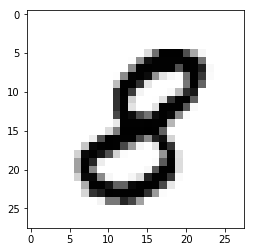

In [4]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels
![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [5]:
# check MNIST labels shape
mnist.train.labels.shape

(55000, 10)

In [6]:
# show MNIST label data
sample_label = mnist.train.labels[5]
sample_label

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.])

# Defining a Neural Network

## in a graph:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-scalargraph.png)

## in a vector equation:
![](https://www.tensorflow.org/versions/master/images/softmax-regression-vectorequation.png)

## so that we'll have the weights like this:
blue: positive weights, red: negative weights
![](https://www.tensorflow.org/versions/master/images/softmax-weights.png)

In [7]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x, W) + b) # the equation
y

<tf.Tensor 'Softmax:0' shape=(?, 10) dtype=float32>

# Defining the Train Step

In [8]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
train_step

<tf.Operation 'GradientDescent' type=NoOp>

## Use Gradient Decent to find the optimal weights
![](http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png)
From: [Machine Learning Blog & Software Development News](http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

# Do 1000 times of mini-batch training

In [9]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Test

In [10]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9139


# Multilayer Neural Network

In [32]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [33]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [34]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [35]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [36]:
# Construct model
pred = multilayer_perceptron(x, weights, biases)

In [37]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [38]:
# Initializing the variables
init = tf.global_variables_initializer()

In [44]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(avg_cost))
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    outlabel=pred.eval({x:mnist.test.images,y:mnist.test.labels})
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Epoch: 0001 cost= 166.486885489
Epoch: 0002 cost= 37.528002226
Epoch: 0003 cost= 23.618938606
Epoch: 0004 cost= 16.601204714
Epoch: 0005 cost= 11.835462474
Epoch: 0006 cost= 8.880631774
Epoch: 0007 cost= 6.668164874
Epoch: 0008 cost= 4.945260505
Epoch: 0009 cost= 3.660840330
Epoch: 0010 cost= 2.814325487
Epoch: 0011 cost= 2.080785188
Epoch: 0012 cost= 1.481434377
Epoch: 0013 cost= 1.137276538
Epoch: 0014 cost= 0.902396857
Epoch: 0015 cost= 0.638290834
Optimization Finished!
Accuracy: 0.9458


In [46]:
outlabel.shape

(10000, 10)

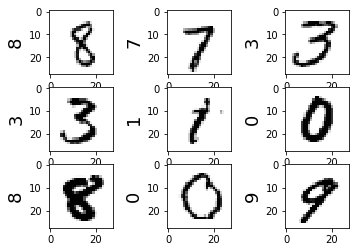

In [62]:
import numpy as np
import random
for a in range(1,10):
    num=random.randint(1,10000)
    plt.subplot(3,3,a)
    plt.imshow(mnist.test.images[num].reshape(28,28)).set_cmap('Greys')
    plt.ylabel(np.argmax(outlabel[num]), fontsize=18)